In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/sars/sars_2003_complete_dataset_clean.csv', encoding = "ISO-8859-1")
covid = pd.read_csv('/home/otavio/ml/datasets/covid/covid_19_clean_complete.csv', encoding = "ISO-8859-1")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative number of case(s)  2538 non-null   int64 
 3   Number of deaths              2538 non-null   int64 
 4   Number recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 99.3+ KB


In [4]:
data[data['Date'] == '2003-07-11']

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
2507,2003-07-11,Brazil,1,0,1
2508,2003-07-11,Canada,250,38,194
2509,2003-07-11,China,5327,348,4941
2510,2003-07-11,"Hong Kong SAR, China",1755,298,1433
2511,2003-07-11,"Macao SAR, China",1,0,1
2512,2003-07-11,"Taiwan, China",671,84,507
2513,2003-07-11,Colombia,1,0,1
2514,2003-07-11,Finland,1,0,1
2515,2003-07-11,France,7,1,6
2516,2003-07-11,Germany,10,0,9


In [5]:
import datetime
covid['Date'] = covid['Date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y').strftime('%Y-%m-%d'))

In [32]:
cov = covid.groupby(['Date'])['Confirmed'].sum().to_frame().reset_index()
cov = cov.sort_values('Date')
cov['Confirmed'] = cov['Confirmed'].apply(lambda x: np.log(x))
cov

,Date,Confirmed
0,2020-01-22,6.318968
1,2020-01-23,6.483107
2,2020-01-24,6.846943
3,2020-01-25,7.268223
4,2020-01-26,7.658228
...,...,...
91,2020-04-22,14.779846
92,2020-04-23,14.811619
93,2020-04-24,14.848515
94,2020-04-25,14.879096


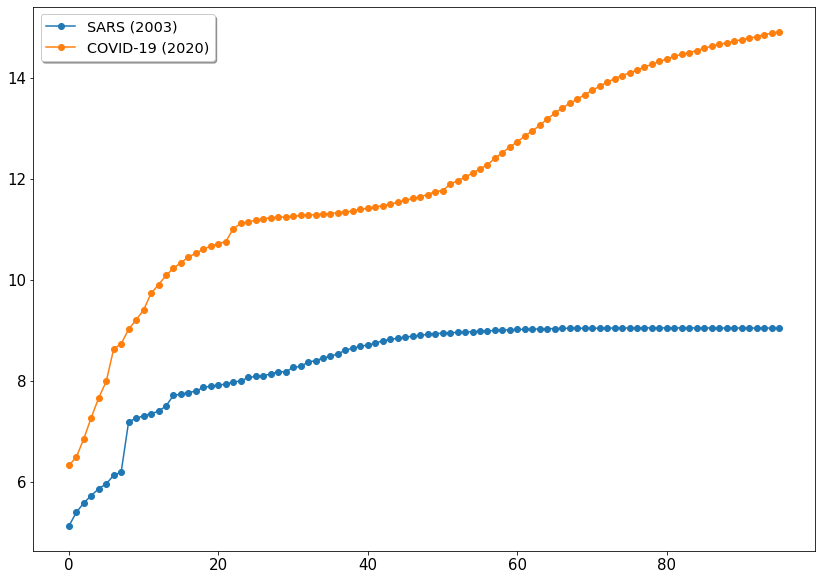

In [34]:
sui = data.groupby(['Date'])['Cumulative number of case(s)'].sum().to_frame().reset_index()
sui['Cumulative number of case(s)'] = sui['Cumulative number of case(s)'].apply(lambda x: np.log(x))
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(sui.index, sui['Cumulative number of case(s)'], marker='o')
ax.plot(cov.index, cov['Confirmed'], marker='o')
plt.yticks(size=15)
plt.xticks(size=15)
ax.legend(['SARS (2003)', 'COVID-19 (2020)'], loc='upper left', shadow=True, fontsize='x-large')
fig.savefig('out2.png')